# Week 1 - Product Mix

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *

## 1) Product Mix Example

Result from using Excel Solver.

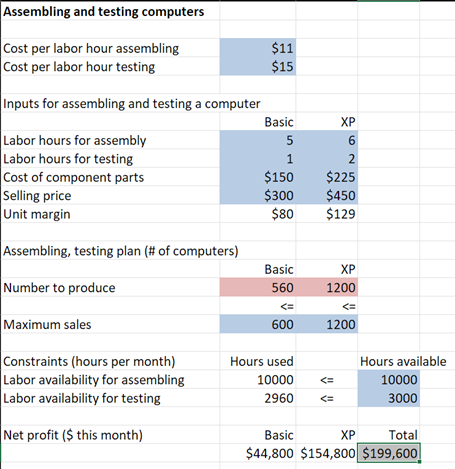

### Problem formulation

In [19]:
sku_names = ['Basic','XP']
n_sku = len(sku_names)

margins = np.array([80, 129])


prob = LpProblem('ProductMix', LpMaximize)
decision_vars = LpVariable.matrix('X', sku_names, lowBound=0)

# Objective function
obj_func = lpSum(decision_vars * margins)
prob += obj_func

# Maximum sales constraints
sales_limits = np.array([600, 1200])
for i in range(n_sku):
    prob += (decision_vars[i] <= sales_limits[i]), f"Maximum sales constraints {i+1}"
    
# Labor hour constraints
labor_hours = np.array([
    [5, 6],
    [1, 2]
])
labor_limits = np.array([10000, 3000])

for j,labor_limit in enumerate(labor_limits):
    prob += lpSum(decision_vars * labor_hours[j]) <= labor_limit, f"Labor constraints {j+1}"

prob

ProductMix:
MAXIMIZE
80*X_Basic + 129*X_XP + 0
SUBJECT TO
Maximum_sales_constraints_1: X_Basic <= 600

Maximum_sales_constraints_2: X_XP <= 1200

Labor_constraints_1: 5 X_Basic + 6 X_XP <= 10000

Labor_constraints_2: X_Basic + 2 X_XP <= 3000

VARIABLES
X_Basic Continuous
X_XP Continuous

### Solve

In [21]:
prob.solve()
print(f"Status: {LpStatus[prob.status]}")
print(f"Objective value: {prob.objective.value()}")
for v in prob.variables():
    print(f"{v.name} = {v.value()}")

Status: Optimal
Objective value: 199600.0
X_Basic = 560.0
X_XP = 1200.0
